In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Question 1

(-0.5, 247.5, 202.5, -0.5)

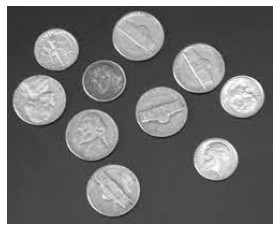

In [5]:
img = cv.imread('coins_1.jfif')


plt.imshow(img)
plt.axis("off")

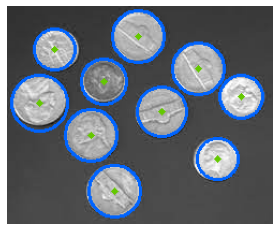

In [11]:
img = cv.imread('coins_1.jfif')

# grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray =cv.GaussianBlur(gray, (7, 7), 1.5)

# Hough circle transform
row = img.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, row/8, param1 = 150, param2 = 25)#row/8 is minDist from the center if it is smaller than 100 the circle will not be counted


# draw the circles
if circles is not None:
    circles = np.uint8(np.around(circles))
    for i in circles[0] :
        # draw both center and circles itself
        center = (i[0], i[1])
        cv.circle(img, center, 1, (100, 200, 0), 3)
        # get radius 
        radius = i[2] # in the third element
        cv.circle(img, center, radius, (0, 100, 255), 2)
        
        
plt.imshow(img)
plt.axis("off")

cv.imshow('coins', img)
cv.waitKey(0)
cv.destroyAllWindows()

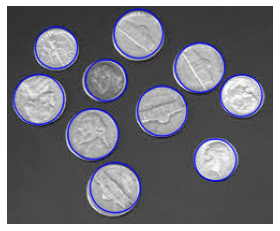

In [10]:
# simple example
img = cv.imread('coins_1.jfif')
blur = cv.medianBlur(img, 5)
gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)

# parameter setting
params = cv.SimpleBlobDetector_Params()
params.minThreshold = 10
params.maxThreshold = 230
params.thresholdStep = 5

params.filterByColor = True
params.blobColor = 255   # this will get the white blob
params.filterByArea = True  # this will get the white blob out false to find black
params.maxArea = 6000  # this will get the white blob
params.filterByConvexity = False
params.filterByInertia = False

# detector
detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(gray)

# draw the keypoints
im_with_keypoints = cv.drawKeypoints(img, keypoints, np.array([]), (0, 0, 255),
                                    cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.imshow(im_with_keypoints)
plt.axis("off")

cv.imshow('blobs' , im_with_keypoints)
cv.waitKey()
cv.destroyAllWindows()

Blob detection algorithm and hough transform can detect the coins in the picture correcly. 

# Question 2


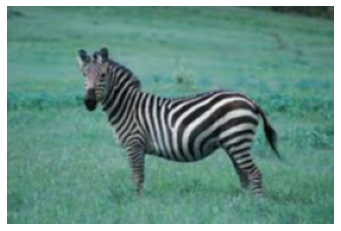

In [14]:
img = cv.imread('zebra.jfif')
img = cv.GaussianBlur(img, (3, 3), 0)


plt.imshow(img)
plt.axis("off")
cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [15]:
# Convert the image to HSV
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# reshape and convert to float32
img_reshape = img_hsv.reshape((-1, 3))
img_reshape = np.float32(img_reshape)

# Define criteria, attempts and number of clusters
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 3.0)
attempts = 10
K = 3

ret, label, center = cv.kmeans(img_reshape, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

# Convert the center to np.uint8
center = np.uint8(center)
res = center[label.flatten()]
result_img = res.reshape(img_hsv.shape)

In [16]:
img_reshape_bgr = img.reshape((-1, 3))
img_reshape_bgr = np.float32(img_reshape_bgr)

# Define criteria, attempts and number of clusters
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 3.0)
attempts = 10
K = 3

ret, label, center = cv.kmeans(img_reshape_bgr, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

# Convert the center to np.uint8
center = np.uint8(center)
res = center[label.flatten()]
result_img_bgr = res.reshape(img.shape)

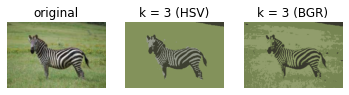

In [17]:
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('original'), plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(result_img, cv.COLOR_HSV2RGB))
plt.title(f'k = {K} (HSV)'), plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(result_img_bgr, cv.COLOR_BGR2RGB))
plt.title(f'k = {K} (BGR)'), plt.axis("off")
plt.show()

HSV can segment out the zebra better than BGR